In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
os.chdir('Resources/')

In [2]:
df = pd.read_csv('10_SP_Preprocessed_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1.158820,0.574685,-0.456786,1.087103,1.101203,-0.512797,-0.727975,1.442922,0.825528,-0.212102,-1.512920,0
1,1.162721,-1.740083,0.427577,-0.904810,-0.247118,-0.512797,-0.727975,1.351213,0.825528,0.771472,0.587149,1
2,-0.001658,0.574685,-0.456786,-1.429224,-1.250553,-0.512797,0.095811,-1.393940,0.825528,-0.212102,-1.512920,0
3,-0.383284,-1.740083,-1.189739,-1.021312,1.507408,-0.512797,-0.727975,1.349357,-1.211346,1.295409,0.587149,1
4,-1.539862,0.574685,0.427577,0.091146,0.884754,-0.512797,-0.727975,0.215621,0.825528,-0.212102,-1.512920,0


In [3]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope
0,1.158820,0.574685,-0.456786,1.087103,1.101203,-0.512797,-0.727975,1.442922,0.825528,-0.212102,-1.512920
1,1.162721,-1.740083,0.427577,-0.904810,-0.247118,-0.512797,-0.727975,1.351213,0.825528,0.771472,0.587149
2,-0.001658,0.574685,-0.456786,-1.429224,-1.250553,-0.512797,0.095811,-1.393940,0.825528,-0.212102,-1.512920
3,-0.383284,-1.740083,-1.189739,-1.021312,1.507408,-0.512797,-0.727975,1.349357,-1.211346,1.295409,0.587149
4,-1.539862,0.574685,0.427577,0.091146,0.884754,-0.512797,-0.727975,0.215621,0.825528,-0.212102,-1.512920
...,...,...,...,...,...,...,...,...,...,...,...
4039,-0.761009,-1.740083,0.427577,-0.433268,-1.383208,-0.512797,-0.727975,-0.927244,0.825528,1.295409,0.587149
4040,0.387768,-1.740083,0.427577,-1.545727,-1.687670,-0.512797,0.095811,-0.138376,0.825528,-1.973617,0.587149
4041,-1.154336,0.574685,1.409690,-0.025356,1.445562,-0.512797,0.095811,1.268632,-1.211346,-0.212102,0.815867
4042,-0.764910,0.574685,-1.189739,-0.904810,-0.994207,-0.512797,-0.727975,-1.365677,0.825528,-0.212102,0.815867


In [4]:
Y = df[['HeartDisease']]
Y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
4039,1
4040,1
4041,0
4042,0


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 403
accuracies_nb = []
positive_predictive_values_nb = []
recalls_nb = []
f1_scores_nb = []
specificities_nb = []
npvs_nb = []
plrs_nb = []
nlrs_nb = []
aucs_nb = []
mccs_nb = []
balanced_accuracies_nb = []
f2_scores_nb = []
fprs_nb = []
fnrs_nb = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    nb = GaussianNB()

    model_nb = nb.fit(X_train, Y_train)
    pred_nb = model_nb.predict(X_test)

    cm_nb = confusion_matrix(Y_test, pred_nb)
    tn, fp, fn, tp = cm_nb.ravel()

    accuracy_nb = accuracy_score(Y_test, pred_nb)
    accuracies_nb.append(accuracy_nb)    

    ppv_nb = precision_score(Y_test, pred_nb)
    positive_predictive_values_nb.append(ppv_nb)    

    recall_nb = recall_score(Y_test, pred_nb)
    recalls_nb.append(recall_nb)    

    f1_score_nb = f1_score(Y_test, pred_nb)
    f1_scores_nb.append(f1_score_nb)    

    specificity_nb = tn / (tn + fp)
    specificities_nb.append(specificity_nb)

    npv_nb = tn / (tn + fn)
    npvs_nb.append(npv_nb)

    plr_nb = recall_nb / (1 - specificity_nb)
    plrs_nb.append(plr_nb)

    nlr_nb = (1 - recall_nb) / specificity_nb
    nlrs_nb.append(nlr_nb)

    # Compute probabilities for ROC AUC
    pred_nb_proba = model_nb.predict_proba(X_test)[:, 1] if hasattr(model_nb, "predict_proba") else None
    if pred_nb_proba is not None:
        auc_nb = roc_auc_score(Y_test, pred_nb_proba)
    else:
        auc_nb = 0.0
    aucs_nb.append(auc_nb)

    mcc_nb = matthews_corrcoef(Y_test, pred_nb)
    mccs_nb.append(mcc_nb)

    balanced_accuracy_nb = balanced_accuracy_score(Y_test, pred_nb)
    balanced_accuracies_nb.append(balanced_accuracy_nb)

    f2_score_nb = fbeta_score(Y_test, pred_nb, beta=2)
    f2_scores_nb.append(f2_score_nb)

    fpr_nb = fp / (fp + tn)
    fprs_nb.append(fpr_nb)

    fnr_nb = fn / (fn + tp)
    fnrs_nb.append(fnr_nb)

print("accuracies_nb: ", accuracies_nb)
print("positive_predictive_values_nb: ", positive_predictive_values_nb)
print("recalls_nb: ", recalls_nb)
print("f1_scores_nb: ", f1_scores_nb)
print("specificities_nb: ", specificities_nb)
print("npvs_nb: ", npvs_nb)
print("plrs_nb: ", plrs_nb)
print("nlrs_nb: ", nlrs_nb)
print("aucs_nb: ", aucs_nb)
print("mccs_nb: ", mccs_nb)
print("balanced_accuracies_nb: ", balanced_accuracies_nb)
print("f2_scores_nb: ", f2_scores_nb)
print("fprs_nb: ", fprs_nb)
print("fnrs_nb: ", fnrs_nb)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

accuracies_nb:  [0.7274725274725274, 0.730840543881335, 0.7393147297774638, 0.7416563658838071, 0.7363996043521266, 0.7416563658838071, 0.7446457990115322, 0.7626699629171817, 0.7851851851851852]
positive_predictive_values_nb:  [0.7490079365079365, 0.7606594656054576, 0.7559449311639549, 0.7532846715328467, 0.7444444444444445, 0.7518796992481203, 0.7606461086637298, 0.7743362831858407, 0.8154506437768241]
recalls_nb:  [0.7565130260521042, 0.7483221476510067, 0.7763496143958869, 0.781226343679031, 0.788235294117647, 0.7891770011273957, 0.7789473684210526, 0.7954545454545454, 0.811965811965812]
f1_scores_nb:  [0.752741774675972, 0.7544403721454751, 0.7660114140773621, 0.7670011148272018, 0.7657142857142857, 0.77007700770077, 0.7696879643387816, 0.7847533632286996, 0.8137044967880086]
specificities_nb:  [0.6922141119221411, 0.7092541436464088, 0.6941176470588235, 0.6943942133815552, 0.6739367502726281, 0.6839945280437757, 0.7030965391621129, 0.7235772357723578, 0.7485380116959064]
npvs_nb

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 4946
accuracies_dtc = []
positive_predictive_values_dtc = []
recalls_dtc = []
f1_scores_dtc = []
specificities_dtc = []
npvs_dtc = []
plrs_dtc = []
nlrs_dtc = []
aucs_dtc = []
mccs_dtc = []
balanced_accuracies_dtc = []
f2_scores_dtc = []
fprs_dtc = []
fnrs_dtc = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    dtc = DecisionTreeClassifier(random_state=seed)

    model_dtc = dtc.fit(X_train, Y_train)
    pred_dtc = model_dtc.predict(X_test)

    cm_dtc = confusion_matrix(Y_test, pred_dtc)
    tn, fp, fn, tp = cm_dtc.ravel()

    accuracy_dtc = accuracy_score(Y_test, pred_dtc)
    accuracies_dtc.append(accuracy_dtc)    

    ppv_dtc = precision_score(Y_test, pred_dtc)
    positive_predictive_values_dtc.append(ppv_dtc)    

    recall_dtc = recall_score(Y_test, pred_dtc)
    recalls_dtc.append(recall_dtc)    

    f1_score_dtc = f1_score(Y_test, pred_dtc)
    f1_scores_dtc.append(f1_score_dtc)    

    specificity_dtc = tn / (tn + fp)
    specificities_dtc.append(specificity_dtc)

    npv_dtc = tn / (tn + fn)
    npvs_dtc.append(npv_dtc)

    plr_dtc = recall_dtc / (1 - specificity_dtc)
    plrs_dtc.append(plr_dtc)

    nlr_dtc = (1 - recall_dtc) / specificity_dtc
    nlrs_dtc.append(nlr_dtc)

    # Compute probabilities for ROC AUC
    pred_dtc_proba = model_dtc.predict_proba(X_test)[:, 1] if hasattr(model_dtc, "predict_proba") else None
    if pred_dtc_proba is not None:
        auc_dtc = roc_auc_score(Y_test, pred_dtc_proba)
    else:
        auc_dtc = 0.0
    aucs_dtc.append(auc_dtc)

    mcc_dtc = matthews_corrcoef(Y_test, pred_dtc)
    mccs_dtc.append(mcc_dtc)

    balanced_accuracy_dtc = balanced_accuracy_score(Y_test, pred_dtc)
    balanced_accuracies_dtc.append(balanced_accuracy_dtc)

    f2_score_dtc = fbeta_score(Y_test, pred_dtc, beta=2)
    f2_scores_dtc.append(f2_score_dtc)

    fpr_dtc = fp / (fp + tn)
    fprs_dtc.append(fpr_dtc)

    fnr_dtc = fn / (fn + tp)
    fnrs_dtc.append(fnr_dtc)

print("accuracies_dtc: ", accuracies_dtc)
print("positive_predictive_values_dtc: ", positive_predictive_values_dtc)
print("recalls_dtc: ", recalls_dtc)
print("f1_scores_dtc: ", f1_scores_dtc)
print("specificities_dtc: ", specificities_dtc)
print("npvs_dtc: ", npvs_dtc)
print("plrs_dtc: ", plrs_dtc)
print("nlrs_dtc: ", nlrs_dtc)
print("aucs_dtc: ", aucs_dtc)
print("mccs_dtc: ", mccs_dtc)
print("balanced_accuracies_dtc: ", balanced_accuracies_dtc)
print("f2_scores_dtc: ", f2_scores_dtc)
print("fprs_dtc: ", fprs_dtc)
print("fnrs_dtc: ", fnrs_dtc)

accuracies_dtc:  [0.7065934065934066, 0.7595797280593325, 0.8074885199576122, 0.8112896580140091, 0.8649851632047477, 0.8572311495673671, 0.8830313014827018, 0.8788627935723115, 0.8691358024691358]
positive_predictive_values_dtc:  [0.7453125, 0.7825600894354388, 0.8217884130982368, 0.831858407079646, 0.880349344978166, 0.883668903803132, 0.8863636363636364, 0.8933901918976546, 0.8978723404255319]
recalls_dtc:  [0.7119402985074627, 0.7825600894354388, 0.8328015315890236, 0.8306332842415317, 0.8811188811188811, 0.861504907306434, 0.9096209912536443, 0.8972162740899358, 0.8791666666666667]
f1_scores_dtc:  [0.7282442748091603, 0.7825600894354388, 0.8272583201267829, 0.8312453942520265, 0.8807339449541285, 0.8724461623412479, 0.897841726618705, 0.8952991452991453, 0.888421052631579]
specificities_dtc:  [0.7, 0.7311679336558397, 0.7761075949367089, 0.7867165575304023, 0.8439635535307517, 0.8516405135520685, 0.8484848484848485, 0.8538011695906432, 0.8545454545454545]
npvs_dtc:  [0.66337209302

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1067
accuracies_rf = []
positive_predictive_values_rf = []
recalls_rf = []
f1_scores_rf = []
specificities_rf = []
npvs_rf = []
plrs_rf = []
nlrs_rf = []
aucs_rf = []
mccs_rf = []
balanced_accuracies_rf = []
f2_scores_rf = []
fprs_rf = []
fnrs_rf = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    rf = RandomForestClassifier(random_state=seed)

    model_rf = rf.fit(X_train, Y_train)
    pred_rf = model_rf.predict(X_test)

    cm_rf = confusion_matrix(Y_test, pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()

    accuracy_rf = accuracy_score(Y_test, pred_rf)
    accuracies_rf.append(accuracy_rf)    

    ppv_rf = precision_score(Y_test, pred_rf)
    positive_predictive_values_rf.append(ppv_rf)    

    recall_rf = recall_score(Y_test, pred_rf)
    recalls_rf.append(recall_rf)    

    f1_score_rf = f1_score(Y_test, pred_rf)
    f1_scores_rf.append(f1_score_rf)    

    specificity_rf = tn / (tn + fp)
    specificities_rf.append(specificity_rf)

    npv_rf = tn / (tn + fn)
    npvs_rf.append(npv_rf)

    plr_rf = recall_rf / (1 - specificity_rf)
    plrs_rf.append(plr_rf)

    nlr_rf = (1 - recall_rf) / specificity_rf
    nlrs_rf.append(nlr_rf)

    # Compute probabilities for ROC AUC
    pred_rf_proba = model_rf.predict_proba(X_test)[:, 1] if hasattr(model_rf, "predict_proba") else None
    if pred_rf_proba is not None:
        auc_rf = roc_auc_score(Y_test, pred_rf_proba)
    else:
        auc_rf = 0.0
    aucs_rf.append(auc_rf)

    mcc_rf = matthews_corrcoef(Y_test, pred_rf)
    mccs_rf.append(mcc_rf)

    balanced_accuracy_rf = balanced_accuracy_score(Y_test, pred_rf)
    balanced_accuracies_rf.append(balanced_accuracy_rf)

    f2_score_rf = fbeta_score(Y_test, pred_rf, beta=2)
    f2_scores_rf.append(f2_score_rf)

    fpr_rf = fp / (fp + tn)
    fprs_rf.append(fpr_rf)

    fnr_rf = fn / (fn + tp)
    fnrs_rf.append(fnr_rf)

print("accuracies_rf: ", accuracies_rf)
print("positive_predictive_values_rf: ", positive_predictive_values_rf)
print("recalls_rf: ", recalls_rf)
print("f1_scores_rf: ", f1_scores_rf)
print("specificities_rf: ", specificities_rf)
print("npvs_rf: ", npvs_rf)
print("plrs_rf: ", plrs_rf)
print("nlrs_rf: ", nlrs_rf)
print("aucs_rf: ", aucs_rf)
print("mccs_rf: ", mccs_rf)
print("balanced_accuracies_rf: ", balanced_accuracies_rf)
print("f2_scores_rf: ", f2_scores_rf)
print("fprs_rf: ", fprs_rf)
print("fnrs_rf: ", fnrs_rf)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionW

accuracies_rf:  [0.768956043956044, 0.8278739184177998, 0.8509360649947015, 0.8722702925422332, 0.8921859545004945, 0.9048207663782447, 0.9299835255354201, 0.9419035846724351, 0.9407407407407408]
positive_predictive_values_rf:  [0.7886904761904762, 0.8288482238966631, 0.8667929292929293, 0.8998505231689088, 0.9103690685413005, 0.9220636663007684, 0.9306930693069307, 0.9360824742268041, 0.9346938775510204]
recalls_rf:  [0.7930174563591023, 0.865654862282181, 0.8667929292929293, 0.8724637681159421, 0.8993055555555556, 0.9100758396533044, 0.9481268011527377, 0.9659574468085106, 0.9662447257383966]
f1_scores_rf:  [0.790848047749316, 0.8468518009348364, 0.8667929292929293, 0.8859455481972038, 0.9048034934497816, 0.916030534351145, 0.939329050678087, 0.9507853403141361, 0.950207468879668]
specificities_rf:  [0.7394495412844037, 0.7817433081674674, 0.830793905372895, 0.8720152817574021, 0.8827586206896552, 0.897841726618705, 0.9057692307692308, 0.9085545722713865, 0.9047619047619048]
npvs_rf:

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1418
accuracies_knn = []
positive_predictive_values_knn = []
recalls_knn = []
f1_scores_knn = []
specificities_knn = []
npvs_knn = []
plrs_knn = []
nlrs_knn = []
aucs_knn = []
mccs_knn = []
balanced_accuracies_knn = []
f2_scores_knn = []
fprs_knn = []
fnrs_knn = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    knn = KNeighborsClassifier()

    model_knn = knn.fit(X_train, Y_train)
    pred_knn = model_knn.predict(X_test)

    cm_knn = confusion_matrix(Y_test, pred_knn)
    tn, fp, fn, tp = cm_knn.ravel()

    accuracy_knn = accuracy_score(Y_test, pred_knn)
    accuracies_knn.append(accuracy_knn)    

    ppv_knn = precision_score(Y_test, pred_knn)
    positive_predictive_values_knn.append(ppv_knn)    

    recall_knn = recall_score(Y_test, pred_knn)
    recalls_knn.append(recall_knn)    

    f1_score_knn = f1_score(Y_test, pred_knn)
    f1_scores_knn.append(f1_score_knn)    

    specificity_knn = tn / (tn + fp)
    specificities_knn.append(specificity_knn)

    npv_knn = tn / (tn + fn)
    npvs_knn.append(npv_knn)

    plr_knn = recall_knn / (1 - specificity_knn)
    plrs_knn.append(plr_knn)

    nlr_knn = (1 - recall_knn) / specificity_knn
    nlrs_knn.append(nlr_knn)

    # Compute probabilities for ROC AUC
    pred_knn_proba = model_knn.predict_proba(X_test)[:, 1] if hasattr(model_knn, "predict_proba") else None
    if pred_knn_proba is not None:
        auc_knn = roc_auc_score(Y_test, pred_knn_proba)
    else:
        auc_knn = 0.0
    aucs_knn.append(auc_knn)

    mcc_knn = matthews_corrcoef(Y_test, pred_knn)
    mccs_knn.append(mcc_knn)

    balanced_accuracy_knn = balanced_accuracy_score(Y_test, pred_knn)
    balanced_accuracies_knn.append(balanced_accuracy_knn)

    f2_score_knn = fbeta_score(Y_test, pred_knn, beta=2)
    f2_scores_knn.append(f2_score_knn)

    fpr_knn = fp / (fp + tn)
    fprs_knn.append(fpr_knn)

    fnr_knn = fn / (fn + tp)
    fnrs_knn.append(fnr_knn)

print("accuracies_knn: ", accuracies_knn)
print("positive_predictive_values_knn: ", positive_predictive_values_knn)
print("recalls_knn: ", recalls_knn)
print("f1_scores_knn: ", f1_scores_knn)
print("specificities_knn: ", specificities_knn)
print("npvs_knn: ", npvs_knn)
print("plrs_knn: ", plrs_knn)
print("nlrs_knn: ", nlrs_knn)
print("aucs_knn: ", aucs_knn)
print("mccs_knn: ", mccs_knn)
print("balanced_accuracies_knn: ", balanced_accuracies_knn)
print("f2_scores_knn: ", f2_scores_knn)
print("fprs_knn: ", fprs_knn)
print("fnrs_knn: ", fnrs_knn)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

accuracies_knn:  [0.6936813186813187, 0.7289864029666254, 0.7340162486753797, 0.7494849608570251, 0.7512363996043522, 0.7595797280593325, 0.7751235584843492, 0.761433868974042, 0.7530864197530864]
positive_predictive_values_knn:  [0.7391304347826086, 0.7509599561162918, 0.7596457938013915, 0.7712418300653595, 0.7728842832469776, 0.7969924812030075, 0.8016528925619835, 0.7933884297520661, 0.7786561264822134]
recalls_knn:  [0.691125433812593, 0.7639508928571429, 0.7630241423125794, 0.7837638376383764, 0.788546255506608, 0.7876857749469215, 0.8185654008438819, 0.8050314465408805, 0.8174273858921162]
f1_scores_knn:  [0.714322316167051, 0.7573997233748271, 0.7613312202852615, 0.7774524158125915, 0.7806367204535543, 0.792311799252536, 0.8100208768267223, 0.7991675338189386, 0.7975708502024291]
specificities_knn:  [0.6968576709796673, 0.685595567867036, 0.6976929196499603, 0.7061567164179104, 0.7034949267192785, 0.7204142011834319, 0.7137176938369781, 0.6987951807228916, 0.6585365853658537]
n

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, matthews_corrcoef, balanced_accuracy_score

seed = 1067
accuracies_svm = []
positive_predictive_values_svm = []
recalls_svm = []
f1_scores_svm = []
specificities_svm = []
npvs_svm = []
plrs_svm = []
nlrs_svm = []
aucs_svm = []
mccs_svm = []
balanced_accuracies_svm = []
f2_scores_svm = []
fprs_svm = []
fnrs_svm = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    svm = SVC(kernel='rbf', probability=True, random_state=seed)
    model_svm = svm.fit(X_train, Y_train)
    pred_svm = model_svm.predict(X_test)
    pred_svm_proba = model_svm.predict_proba(X_test)[:, 1]

    cm_svm = confusion_matrix(Y_test, pred_svm)
    tn, fp, fn, tp = cm_svm.ravel()

    accuracy_svm = accuracy_score(Y_test, pred_svm)
    accuracies_svm.append(accuracy_svm)    

    ppv_svm = precision_score(Y_test, pred_svm)
    positive_predictive_values_svm.append(ppv_svm)    

    recall_svm = recall_score(Y_test, pred_svm)
    recalls_svm.append(recall_svm)    

    f1_score_svm = f1_score(Y_test, pred_svm)
    f1_scores_svm.append(f1_score_svm)    

    specificity_svm = tn / (tn + fp)
    specificities_svm.append(specificity_svm)

    npv_svm = tn / (tn + fn)
    npvs_svm.append(npv_svm)

    plr_svm = recall_svm / (1 - specificity_svm)
    plrs_svm.append(plr_svm)

    nlr_svm = (1 - recall_svm) / specificity_svm
    nlrs_svm.append(nlr_svm)

    auc_svm = roc_auc_score(Y_test, pred_svm_proba)
    aucs_svm.append(auc_svm)

    mcc_svm = matthews_corrcoef(Y_test, pred_svm)
    mccs_svm.append(mcc_svm)

    balanced_accuracy_svm = balanced_accuracy_score(Y_test, pred_svm)
    balanced_accuracies_svm.append(balanced_accuracy_svm)

    f2_score_svm = fbeta_score(Y_test, pred_svm, beta=2)
    f2_scores_svm.append(f2_score_svm)

    fpr_svm = fp / (fp + tn)
    fprs_svm.append(fpr_svm)

    fnr_svm = fn / (fn + tp)
    fnrs_svm.append(fnr_svm)

print("accuracies_svm: ", accuracies_svm)
print("positive_predictive_values_svm: ", positive_predictive_values_svm)
print("recalls_svm: ", recalls_svm)
print("f1_scores_svm: ", f1_scores_svm)
print("specificities_svm: ", specificities_svm)
print("npvs_svm: ", npvs_svm)
print("plrs_svm: ", plrs_svm)
print("nlrs_svm: ", nlrs_svm)
print("aucs_svm: ", aucs_svm)
print("mccs_svm: ", mccs_svm)
print("balanced_accuracies_svm: ", balanced_accuracies_svm)
print("f2_scores_svm: ", f2_scores_svm)
print("fprs_svm: ", fprs_svm)
print("fnrs_svm: ", fnrs_svm)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

accuracies_svm:  [0.7541208791208791, 0.7632880098887516, 0.7756976333451078, 0.7915121549237742, 0.8026706231454006, 0.799752781211372, 0.8138385502471169, 0.8207663782447466, 0.8197530864197531]
positive_predictive_values_svm:  [0.7447089947089947, 0.7481626653601176, 0.7816023738872404, 0.8026315789473685, 0.7985725614591594, 0.8016112789526687, 0.8078947368421052, 0.8060263653483992, 0.8082706766917294]
recalls_svm:  [0.8423940149625935, 0.8583473861720068, 0.8314393939393939, 0.8398550724637681, 0.8741319444444444, 0.8624052004333694, 0.8847262247838616, 0.9106382978723404, 0.9071729957805907]
f1_scores_svm:  [0.7905452843435525, 0.7994764397905759, 0.805750994187825, 0.8208215297450425, 0.8346456692913385, 0.8308977035490606, 0.844566712517194, 0.8551448551448552, 0.8548707753479126]
specificities_svm:  [0.6458715596330276, 0.6472203157172272, 0.7048917401764234, 0.7277936962750716, 0.7080459770114943, 0.7165467625899281, 0.7192307692307692, 0.696165191740413, 0.6964285714285714]

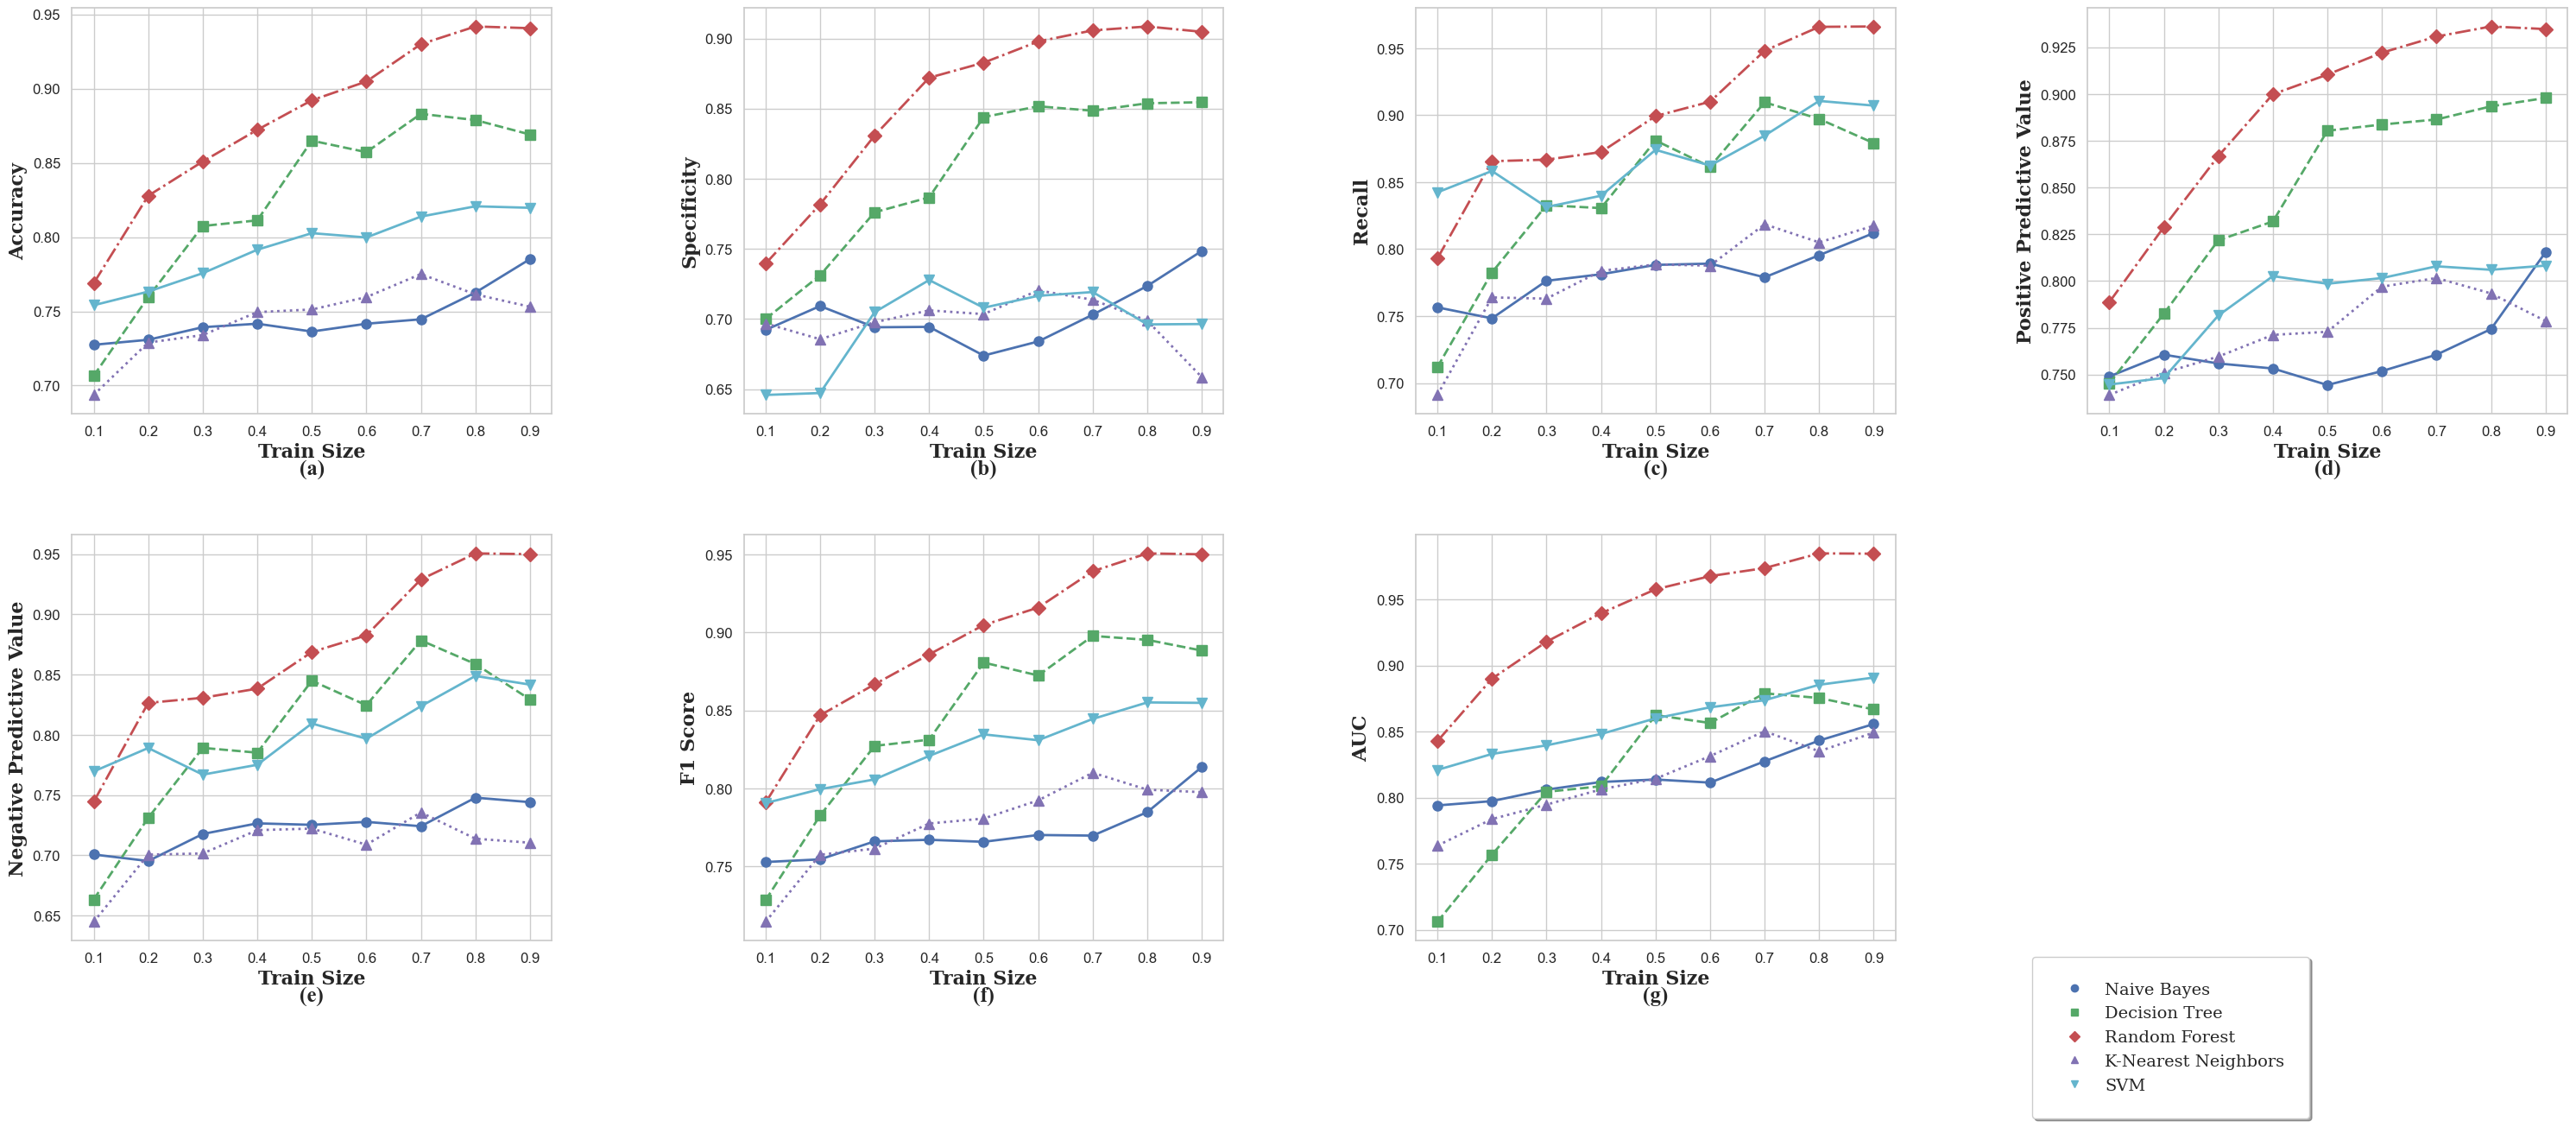

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
train_sizes = np.linspace(0.1, 0.9, 9)

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(30, 14))  # Adjusted figsize for 2x4 layout
sns.set(style="whitegrid")

# Accuracies
axes[0, 0].plot(train_sizes, accuracies_nb, marker='o', label='Naive Bayes', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_dtc, marker='s', label='Decision Tree', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_rf, marker='D', label='Random Forest', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_knn, marker='^', label='K-Nearest Neighbors', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_svm, marker='v', label='SVM', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 0].set_ylabel('Accuracy', fontsize=16, fontweight='bold', family='serif')
axes[0, 0].text(0.5, -0.15, '(a)', transform=axes[0, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Specificities
axes[0, 1].plot(train_sizes, specificities_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 1].set_ylabel('Specificity', fontsize=16, fontweight='bold', family='serif')
axes[0, 1].text(0.5, -0.15, '(b)', transform=axes[0, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Recalls
axes[0, 2].plot(train_sizes, recalls_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 2].set_ylabel('Recall', fontsize=16, fontweight='bold', family='serif')
axes[0, 2].text(0.5, -0.15, '(c)', transform=axes[0, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Positive Predictive Values
axes[0, 3].plot(train_sizes, positive_predictive_values_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 3].plot(train_sizes, positive_predictive_values_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 3].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[0, 3].set_ylabel('Positive Predictive Value', fontsize=16, fontweight='bold', family='serif')
axes[0, 3].text(0.5, -0.15, '(d)', transform=axes[0, 3].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# NPVs
axes[1, 0].plot(train_sizes, npvs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, npvs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[1, 0].set_ylabel('Negative Predictive Value', fontsize=16, fontweight='bold', family='serif')
axes[1, 0].text(0.5, -0.15, '(e)', transform=axes[1, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# F1 Scores
axes[1, 1].plot(train_sizes, f1_scores_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, f1_scores_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[1, 1].set_ylabel('F1 Score', fontsize=16, fontweight='bold', family='serif')
axes[1, 1].text(0.5, -0.15, '(f)', transform=axes[1, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# AUCs
axes[1, 2].plot(train_sizes, aucs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, aucs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
axes[1, 2].set_ylabel('AUC', fontsize=16, fontweight='bold', family='serif')
axes[1, 2].text(0.5, -0.15, '(g)', transform=axes[1, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Times New Roman')

# Hide the last unused subplot
axes[1, 3].axis('off')

# Create a dummy plot for the legend
dummy_plot = fig.add_subplot(1, 1, 1, frameon=False)
dummy_plot.plot([], [], 'o', label='Naive Bayes', color='b')
dummy_plot.plot([], [], 's', label='Decision Tree', color='g')
dummy_plot.plot([], [], 'D', label='Random Forest', color='r')
dummy_plot.plot([], [], '^', label='K-Nearest Neighbors', color='m')
dummy_plot.plot([], [], 'v', label='SVM', color='c')
dummy_plot.legend(loc='lower right', bbox_to_anchor=(0.9, -0.2), frameon=True, fancybox=True, shadow=True, borderpad=1.5, prop={'size': 14, 'family': 'serif'})
dummy_plot.axis('off')

# Adjust tick label font size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.savefig('Images/10_ml_classifier_metrics_2x4.png', transparent=True)
plt.show()

In [11]:
print('Average Accuracy: ')
print('nb: ', sum(accuracies_nb) / 9)
print('dtc: ', sum(accuracies_dtc) / 9)
print('rf: ', sum(accuracies_rf) / 9)
print('knn: ', sum(accuracies_knn)/ 9)
print('svm: ', sum(accuracies_svm) / 9)

Average Accuracy: 
nb:  0.7455378982627741
dtc:  0.826466391435625
rf:  0.8810745435264571
knn:  0.7451809895617234
svm:  0.7934888996163224


In [12]:
print('Average Specificity: ')
print('nb: ', sum(specificities_nb) / 9)
print('dtc: ', sum(specificities_dtc) / 9)
print('rf: ', sum(specificities_rf) / 9)
print('knn: ', sum(specificities_knn) / 9)
print('svm: ', sum(specificities_svm) / 9)

Average Specificity: 
nb:  0.7025692423284122
dtc:  0.8051586250918574
rf:  0.8581875657436724
knn:  0.6979179403047785
svm:  0.695799398200325


In [13]:
print('Average Recall: ')
print('nb: ', sum(recalls_nb) / 9)
print('dtc: ', sum(recalls_dtc) / 9)
print('rf: ', sum(recalls_rf) / 9)
print('knn: ', sum(recalls_knn) / 9)
print('svm: ', sum(recalls_svm) / 9)

Average Recall: 
nb:  0.7806879058738311
dtc:  0.8429514360232242
rf:  0.8986265983287398
knn:  0.7799022855945666
svm:  0.8679011700947076


In [14]:
print('Average PPV: ')
print('nb: ', sum(positive_predictive_values_nb) / 9)
print('dtc: ', sum(positive_predictive_values_dtc) / 9)
print('rf: ', sum(positive_predictive_values_rf) / 9)
print('knn: ', sum(positive_predictive_values_knn) / 9)
print('svm: ', sum(positive_predictive_values_svm) / 9)

Average PPV: 
nb:  0.7628504649032395
dtc:  0.8470182030090492
rf:  0.8908982564973112
knn:  0.7738391364457665
svm:  0.788831248021976


In [15]:
print('Average NPV: ')
print('nb: ', sum(npvs_nb) / 9)
print('dtc: ', sum(npvs_dtc) / 9)
print('rf: ', sum(npvs_rf) / 9)
print('knn: ', sum(npvs_knn) / 9)
print('svm: ', sum(npvs_svm) / 9)

Average NPV: 
nb:  0.7233172776323747
dtc:  0.8005761416259046
rf:  0.8690209219287648
knn:  0.7065700885178798
svm:  0.8024101817718133


In [16]:
print('Average F1-Score: ')
print('nb: ', sum(f1_scores_nb) / 9)
print('dtc: ', sum(f1_scores_dtc) / 9)
print('rf: ', sum(f1_scores_rf) / 9)
print('knn: ', sum(f1_scores_knn) / 9)
print('svm: ', sum(f1_scores_svm) / 9)

Average F1-Score: 
nb:  0.7715701992773951
dtc:  0.8448944567186907
rf:  0.8946215793163448
knn:  0.7766903840215457
svm:  0.8263022182130396


In [17]:
print('Average AUC: ')
print('nb: ', sum(aucs_nb) / 9)
print('dtc: ', sum(aucs_dtc) / 9)
print('rf: ', sum(aucs_rf) / 9)
print('knn: ', sum(aucs_knn) / 9)
print('svm: ', sum(aucs_svm) / 9)

Average AUC: 
nb:  0.8179374438338143
dtc:  0.8240550305575409
rf:  0.9400000357033347
knn:  0.8143598661264039
svm:  0.8578830621213154
